# Sub Class 모델링

모델 이란 것은 Input을 Output으로 만들어주는 수식이다. 

해당 기능을 수행하는 두 가지 클래스가 `tf.keras.layers.Layer` 와 `tf.keras.layers.Model` 클래스이다. 

두가지 모두 **연산을 추상화** 하는 것으로 동일한 역할을 하지만, `tf.keras.layers.Model` 클래스의 경우 모델을 저장 하는 기능 과 `fit`, `save` 함수를 사용할 수 있다는 점에서 차이가 있다. 

- tf.keras.layers.Layer
- tf.keras.layers.Model

In [174]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [175]:
np.random.seed(7777)
tf.random.set_seed(7777)

### Linear Regression을 Layer로 만들어 보자. 

In [176]:
# # 강의본
# class LinearRegression(tf.keras.layers.Layer):
#     def __init__(self, units=1):      # units 은 몇개의 output을 나타내는지를 나타냄
#                        # units 기본값을 1로 지정
#         super(LinearRegression, self).__init__()
#         self.units = units

#     def build(self, input_shape):       
#         self.w = self.add_weight(       # 레이어 클래스에 들어있는 하이 메서드
#             shape = (input_shape[-1], self.units),   
#                       # feature 개수를 받아옴.
#             initializer = 'random_normal',
#             trainable = True
#         )  

#         self.b = tf.Variable(0.0)


#         # self.w = tf.Variable()
#         # y_hat = w * input * b   # y_hat : y 추정치
        
#     def call(self, inputs):  # overiding이라고도 한다.
#         return tf.matmul(inputs, self.w) + self.b

In [177]:
# 해설본
class LinearRegression(tf.keras.layers.Layer):
    def __init__(self, units):
        super(LinearRegression, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape = (input_shape[-1], self.units),
            initializer='random_normal',
            trainable = True
        )
        self.b = tf.Variable(0.0)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

### 가상 데이터

In [178]:
# W_true = np.array([3., 2., 4., 1.]).reshape(4, 1)
# B_true = np.array([1.])         # 정답

In [179]:
# 해설본
W_true  = np.array([[3., 2., 4., 1.]]).reshape((4,1))
B_true = np.array([1.])

In [180]:
# X = tf.random.normal((500, 4))
# noise = tf.random.normal((500, 1))

# y = X @ W_true + B_true + noise
#      # np.dot()

In [181]:
# 해설본

X = tf.random.normal((500, 4))
noise = tf.random.normal((500, 1))

y = X @ W_true + B_true + noise

In [182]:
# opt = tf.keras.optimizers.SGD(learning_rate=0.03)

# linear_layer = LinearRegression(1)

In [183]:
# 해설본
opt = tf.keras.optimizers.SGD(learning_rate=3e-2)
                                            # 0.03

linear_layer = LinearRegression(1)

In [184]:
# for epoch in range(100):
#     with tf.GradientTape() as tape:
#         y_hat = linear_layer(X)
#         loss = tf.reduce_mean(tf.square(y - y_hat))
#             # mean_squared_error  구현

#     grads = tape.gradient(loss, linear_layer.trainable_weights)

#     # w.assign_sub(lr*dw)
#     opt.apply_gradients(zip(grads, linear_layer.trainable_weights))
    
#     if epoch % 10 == 0:
#         print('epoch : {} loss : {}'.format(epoch, loss.numpy()))

In [185]:
# 해설본
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_hat = linear_layer(X)
        loss = tf.reduce_mean(tf.square((y - y_hat)))

    grads = tape.gradient(loss, linear_layer.trainable_weights)
    opt.apply_gradients(zip(grads, linear_layer.trainable_weights))

    if epoch % 10 == 0:
        print('epoch : {} lost : {}'.format(epoch, loss.numpy()))

epoch : 0 lost : 33.17792510986328
epoch : 10 lost : 9.75960636138916
epoch : 20 lost : 3.336604118347168
epoch : 30 lost : 1.5702284574508667
epoch : 40 lost : 1.0829838514328003
epoch : 50 lost : 0.9481188058853149
epoch : 60 lost : 0.9106447100639343
epoch : 70 lost : 0.900187075138092
epoch : 80 lost : 0.8972545862197876
epoch : 90 lost : 0.8964278697967529


In [186]:
# linear_layer.trainable_weights

In [187]:
# 해설본
linear_layer(X[:1])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.7251954]], dtype=float32)>

----------------

### ResNet - Sub Class 로 구현 하기 

1. Residual Block - Layer
2. ResNet  - Model

In [188]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

In [189]:
# class ResidualBlock(tf.keras.layers.Layer):

#     def __init__(self, filters=32, filter_match=False):
#                         # residualblock 에 필요한 filters
#                                     # filter_match가 True이면 

#         super(ResidualBlock, self).__init__()

#         self.conv1 = Conv2D(filters, kernel_size=1, padding='same', activation = 'relu')
#         self.conv2 = Conv2D(filters, kernel_size=3, padding='same', activation = 'relu')
#         self.conv3 = Conv2D(filters, kernel_size=1, padding='same', activation = 'relu')
#         self.add = Add()

        
#         self.filters = filters
#         self.filter_match = filter_match
        
#         if filter_match:    # True일때
#             # 강의에서는 self.filter_match
#             self.conv_ext = Conv2D(filters, kernel_size=1, padding='same')

#     def call(self, inputs):
#         net1 = self.conv1(inputs)
#         net2 = self.conv2(net1)
#         net3 = self.conv3(net2)
        
#         if self.filter_match:
#             res = self.add([self.conv_ext(inputs), net3])
#             # res : result

#         else:
#             res = self.add([inputs, net3])
        
#         return res

In [190]:
# 해설본
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters = 32, filter_match = False):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, kernel_size=1, padding = 'same', activation='relu')
        self.conv2 = Conv2D(filters, kernel_size=3, padding = 'same', activation='relu')
        self.conv3 = Conv2D(filters, kernel_size=1, padding = 'same', activation='relu')
        self.add = Add()

        self.filters = filters
        self.filter_match = filter_match
        if filter_match:
            self.conv_ext = Conv2D(filters, kernel_size=1, padding='same')

    def call(self, inputs):
        net1 = self.conv1(inputs)
        net2 = self.conv2(net1)
        net3 = self.conv3(net2)
        if self.filter_match:
            res = self.add([self.conv_ext(inputs), net3])

        else:
            res = self.add([inputs, net3])

        return res

In [191]:
# class ResNet(tf.keras.Model):
#     def __init__(self, num_classes):
#         super(ResNet, self).__init__()

#         self.conv1 = Conv2D(32, kernel_size=3, strides=2, padding='same', activation = 'relu')
#         self.maxp1 = MaxPool2D()
#         self.block1 = ResidualBlock(64, True)
#         self.block2 = ResidualBlock(64)
#         self.maxp2 = MaxPool2D
#         self.flat = Flatten()
#         self.dense = Dense(num_classes)

#     def call(self, inputs):
#         x = self.conv1(inputs)
#         x = self.maxp1(x)
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.maxp2(x)
#         x = self.flat(x)
        
#         return self.dense(x)

In [192]:
# 해설본
class ResNet(tf.keras.Model):

    def __init__(self, num_classes):
        super(ResNet, self).__init__()

        self.conv1 = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')
        self.maxp1 = MaxPool2D()
        self.block_1 = ResidualBlock(64, True)
        self.block_2 = ResidualBlock(64)
        self.maxp2 = MaxPool2D()
        self.flat = Flatten()
        self.dense = Dense(num_classes)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.maxp1(x)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.maxp2(x)
        x = self.flat(x)
        return self.dense(x)

model = ResNet(num_classes=10)

In [193]:
# model = ResNet(10)
# model = ResNet(num_classes=10)
               # number of class

### 학습 시켜보기

---------------

In [194]:
# class DataLoader():

#     def __init__(self):
#         (self.train_x, self.train_y), \
#             (self.test_x, self.test_y) = tf.keras.datasets.cifar10.load_data()

#         # (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
#         self.input_shape = self.train_x.shape[1:]

#     # def validate_pixel_scale(self, x):
#     #     return 255 >= x.max() and 0 <= x.min()

#     def scale(self, x):
#         return (x / 255.0).astype(np.float32)

#     def preprocess_dataset(self, dataset):
#         (feature, target) = dataset
#         # 강의에서는 feature, target = dataset // 괄호로 묶지 않음

#         # validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])
#         # validated_y = np.array([y for x,y in zip(feature, target) if self.validate_pixel_scale(x)])

#         # scale
#         # scaled_x = np.array([self.scale(x) for x in validated_x])
#         scaled_x = np.array([self.scale(x) for x in feature])
        
#         # flatten   CNN에서는 안쓴다고 함
#         # flatten_x = scaled_x.reshape((scaled_x.shape[0], -1))

#         # expand
#         # expanded_x = scaled_x[:, :, :, np.newaxis]      # 컬러 이미지는 expand가 필요가 없다.
#                                         # 가짜 차원 하나를 추가한다.
#                               # 인덱스 전체
#                                 # height
#                                     # width


#         # label encoding
#         ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) 
#                         for y in target])
#                                 # 강의에서는 validated_y  
#                                     # shape 1을 없애야 한다. >> squeeze


#         return scaled_x, ohe_y.squeeze(1)  #ohe_y      
#                 # scaled_x 로 변경
#                         # train_y, test_y의 shape 1을 제거하기 위해서
#                         # 강의에서는 np.squeeze(ohe_y, axis=1)
    
#     def get_train_dataset(self):
#         return self.preprocess_dataset((self.train_x, self.train_y))
    
#     def get_test_dataset(self):
#         return self.preprocess_dataset((self.test_x, self.test_y))

In [195]:
# 해설본
class Cifar10DataLoader():
    def __init__(self):
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.cifar10.load_data()
        self.input_shape = self.train_x.shape[1:]

    def scale(self, x):
        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):
        (feature, target) = dataset

        # scaling
        scaled_x = np.array([self.scale(x) for x in feature])

        # label encoding
        ohe_y = np.array([tf.keras.utils.to_categorical(
            y, num_classes=10) for y in target])

        return scaled_x, ohe_y.squeeze(1)

    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))

    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))



--------------

In [196]:
# loader = DataLoader()

# train_x, train_y = loader.get_train_dataset()

# test_x, test_y = loader.get_test_dataset()   # loader.get_test_dataset()

# print(train_x.shape, train_x.dtype)
# print(train_y.shape, train_y.dtype)
# print(test_x.shape, test_x.dtype)
# print(test_y.shape, test_y.dtype)


In [197]:
# 해설본
cifar10_loader = Cifar10DataLoader()

train_x, train_y = cifar10_loader.get_train_dataset()

print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

test_x, test_y = cifar10_loader.get_test_dataset()

print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(50000, 10) float32
(10000, 32, 32, 3) float32
(10000, 10) float32


In [198]:
# # 학습하기
# lr = 0.03       # 각자마다 좋아하는 러닝 레이트(초기값)가 있다. 
# opt = tf.keras.optimizers.Adam(lr)
# loss = tf.keras.losses.categorical_crossentropy

# model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [199]:
# 해설본    
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [200]:
# hist = model.fit(train_x, train_y, epochs=1, batch_size=128, validation_data=(test_x, test_y))

#Call arguments received:
    #   • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
    # 모델 모형이 잘못되었다는 이야기 같은데

In [203]:
# 해설본
hist = model.fit(train_x, train_y, 
        epochs=2, batch_size = 128, 
        validation_data=(test_x, test_y))

Epoch 1/2
391/391 [==============================] - 9s 22ms/step - loss: 2.2627 - accuracy: 0.1553 - val_loss: 2.2731 - val_accuracy: 0.1241
Epoch 2/2
391/391 [==============================] - 9s 22ms/step - loss: 2.2234 - accuracy: 0.1654 - val_loss: 2.2366 - val_accuracy: 0.1607


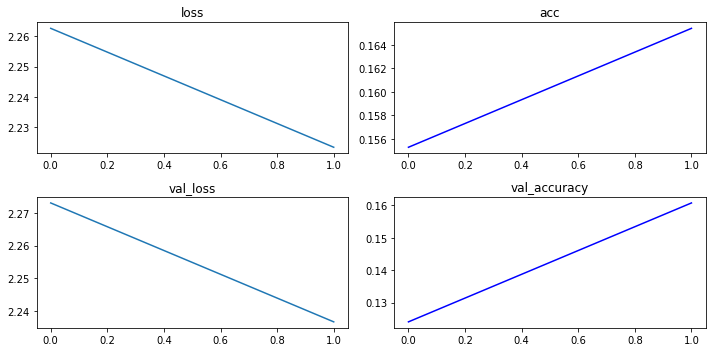

In [204]:
plt.figure(figsize=(10, 5))
plt.subplot(221)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(222)
plt.plot(hist.history['accuracy'], 'b-')
plt.title("acc")
plt.subplot(223)
plt.plot(hist.history['val_loss'])
plt.title("val_loss")
plt.subplot(224)
plt.plot(hist.history['val_accuracy'], 'b-')
plt.title("val_accuracy")

plt.tight_layout()
plt.show()